<a href="https://www.kaggle.com/code/mohamedelgazar74/linear-rgression-from-scratch?scriptVersionId=240319330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn import metrics
import math

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/kaggle/input/dataset/Ecommerce_Customers.xlsx")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [7]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette("Blues", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.000000,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.000000,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.000000,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.000000,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.000000,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [9]:
df.duplicated().sum()

0

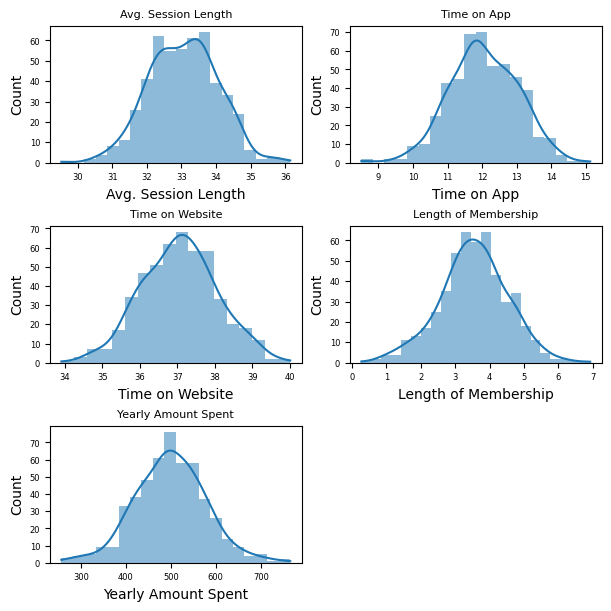

In [10]:

numeric_cols = df.select_dtypes(include='number').columns

cols = 2
rows = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(
    nrows=rows,
    ncols=cols,
    figsize=(6, rows * 2),     
    constrained_layout=True    
)

axes = axes.flatten()

for ax, feature in zip(axes, numeric_cols):
    sns.histplot(
        data=df,
        x=feature,
        kde=True,
        ax=ax,
        edgecolor=None,
        linewidth=0
    )
    ax.set_title(feature, fontsize=8)      
    ax.tick_params(axis='both', labelsize=6) 
    
for ax in axes[len(numeric_cols):]:
    fig.delaxes(ax)

plt.show()

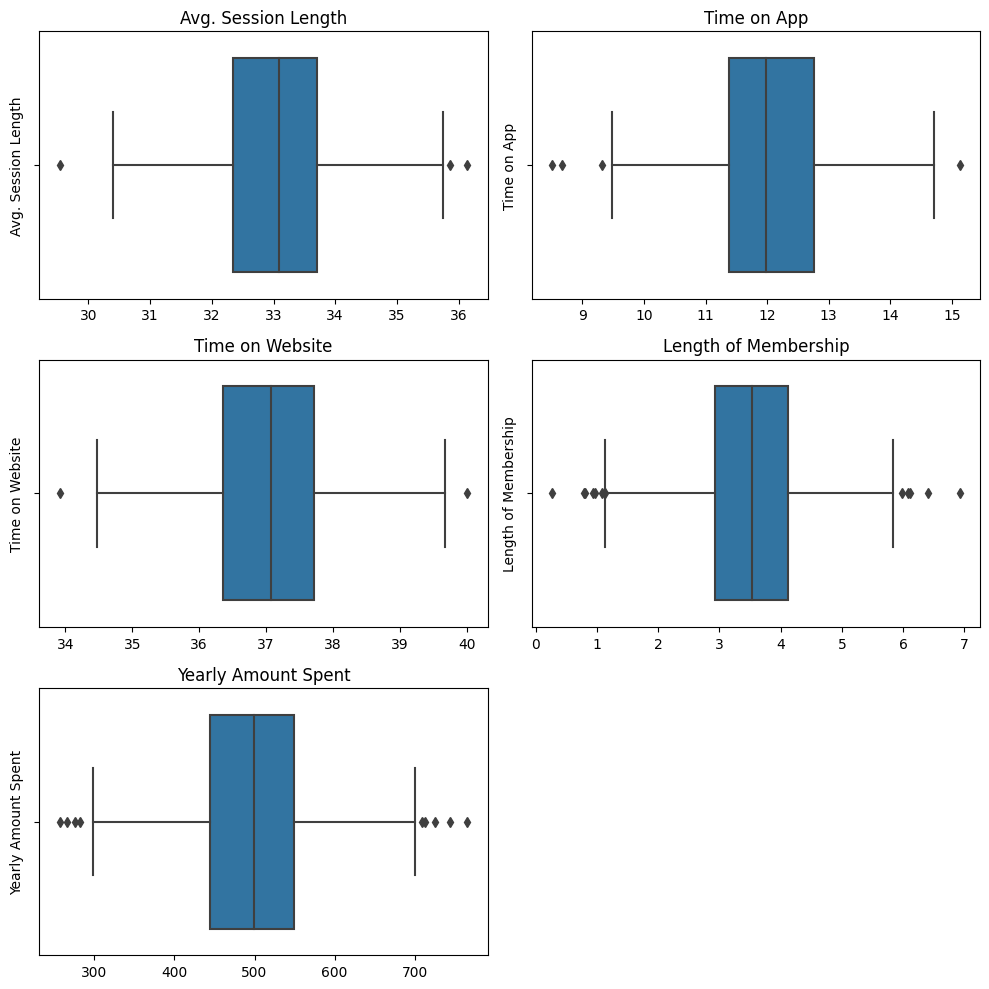

In [11]:
plt.figure(figsize=(10, 10))
numeric_cols = df.select_dtypes(include='number').columns

for i, feature in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

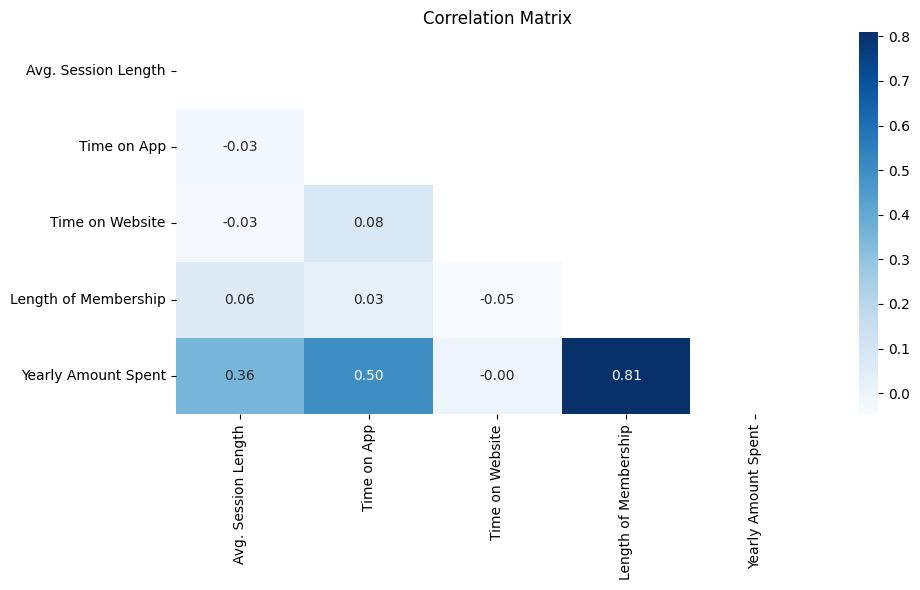

In [12]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [13]:
df.drop_duplicates(inplace=True)

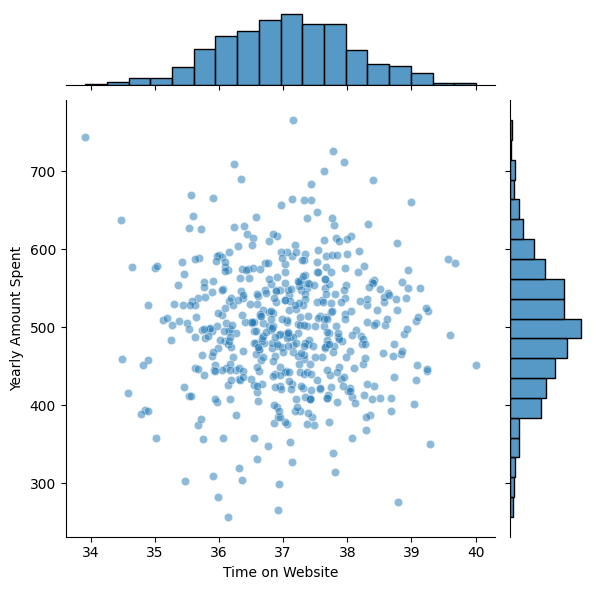

In [14]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha = 0.5)

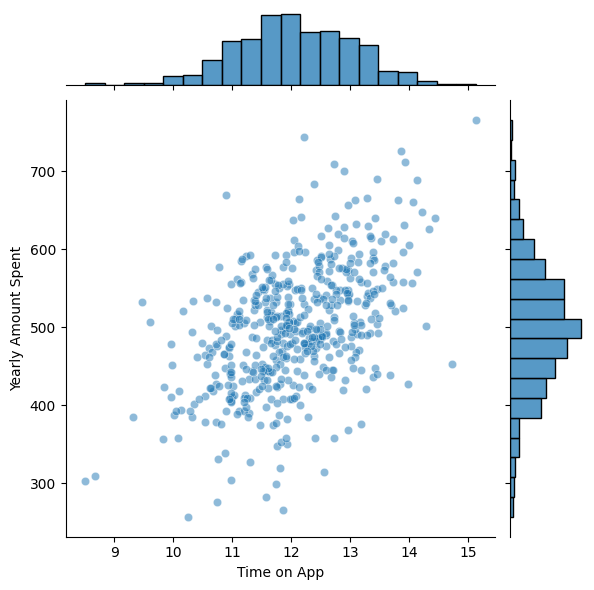

In [15]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha = 0.5)

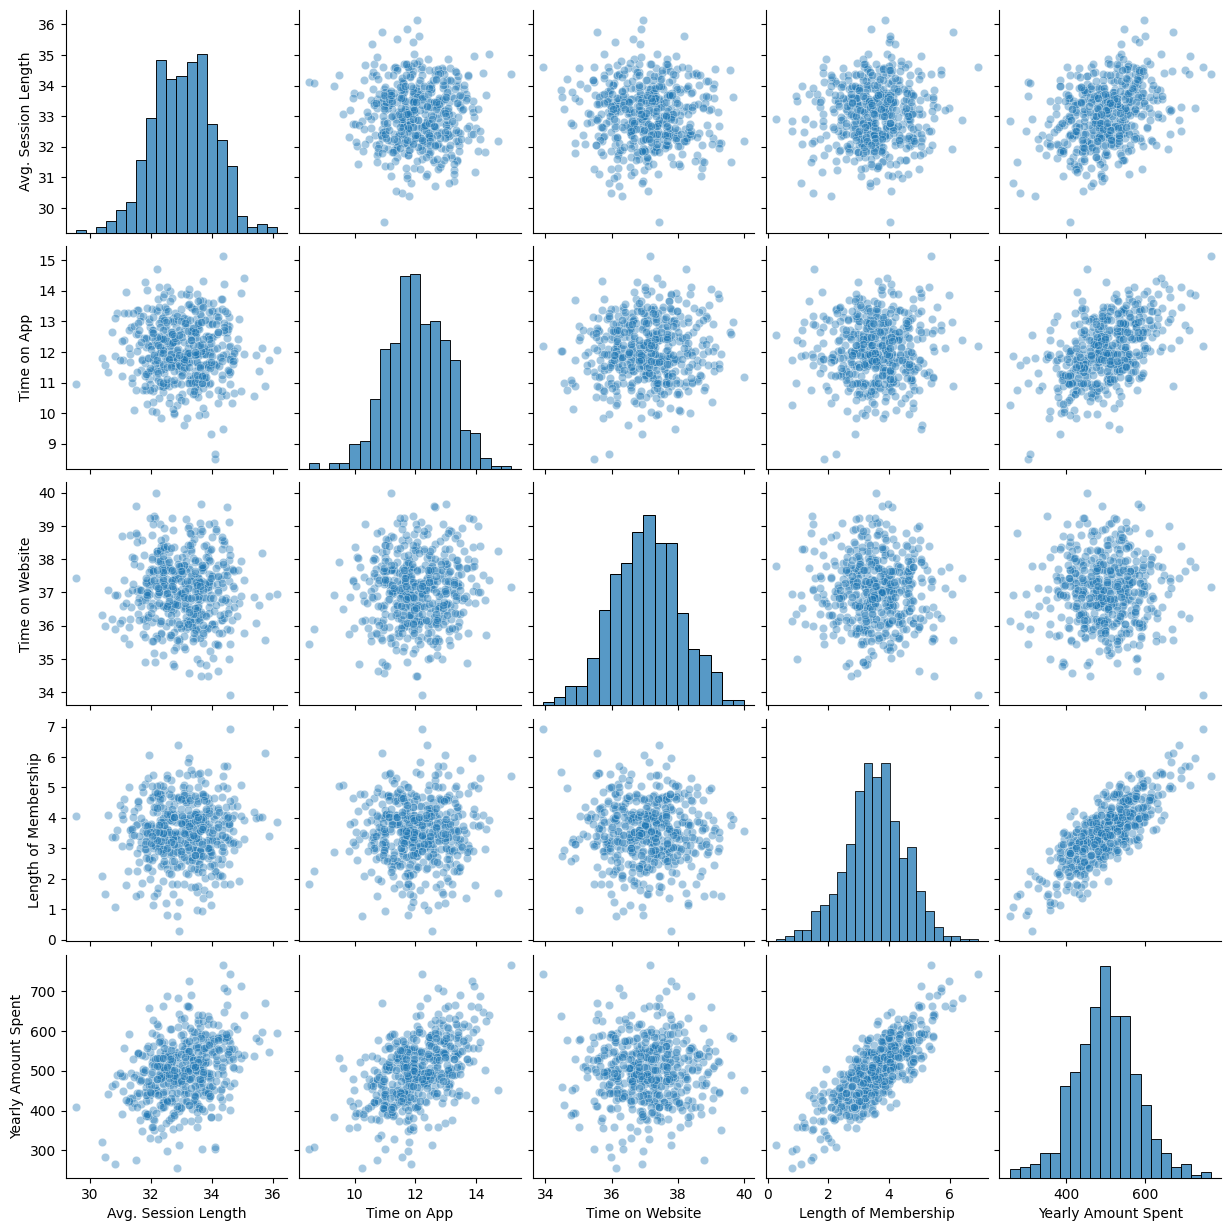

In [16]:
sns.pairplot(df, kind = "scatter", plot_kws={'alpha': 0.4})

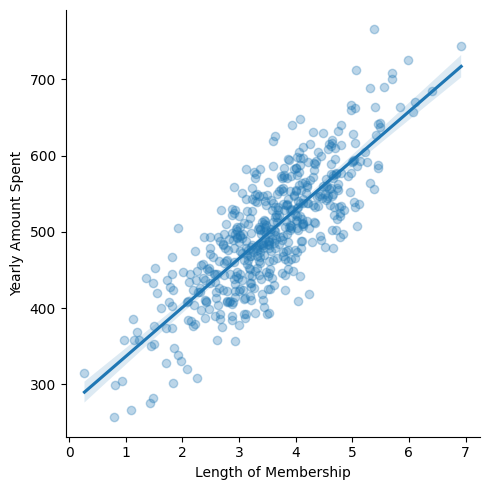

In [17]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent',
          data=df, scatter_kws={'alpha':0.3})

In [18]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, n_iters=200, regularization=None, lambda_=0.01, use_sgd=False):
        self.lr = lr
        self.n_iters = n_iters
        self.regularization = regularization
        self.lambda_ = lambda_
        self.use_sgd = use_sgd
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iters):
            if self.use_sgd:
                indices = np.random.permutation(n_samples)
                total_loss = 0
                for i in indices:
                    xi = X[i].reshape(1, -1)
                    yi = y[i]
                    y_pred = np.dot(xi, self.weights) + self.bias
                    error = y_pred - yi  # shape: (1,)

                    dw = xi.T * error  # أو: np.dot(xi.T, error)
                    db = error

                    if self.regularization == "ridge":
                        dw += self.lambda_ * self.weights.reshape(-1, 1)

                    self.weights -= self.lr * dw.flatten()
                    self.bias -= self.lr * db

                    total_loss += error**2

                self.losses.append(total_loss / n_samples)

            else:
                y_pred = np.dot(X, self.weights) + self.bias
                error = y_pred - y

                dw = (1 / n_samples) * np.dot(X.T, error)
                db = (1 / n_samples) * np.sum(error)

                if self.regularization == "ridge":
                    dw += self.lambda_ * self.weights

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

                loss = np.mean(error**2)
                self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model_scratch = LinearRegressionScratch(lr=0.01, n_iters=1000)
model_scratch.fit(X_train_scaled, y_train)

print("Weights from scratch model:", model_scratch.weights)
print("Bias from scratch model:", model_scratch.bias)

y_pred_scratch = model_scratch.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
print("MSE (Scratch):", mean_squared_error(y_test, y_pred_scratch))


Weights from scratch model: [25.24970434 38.70270895  0.31549356 63.54139954]
Bias from scratch model: 501.9704795850947
MSE (Scratch): 109.8285460471831


In [23]:
y_pred1 = model_scratch.predict(X_test_scaled)
y_pred1

array([402.84294568, 542.51065568, 426.59995012, 501.89261103,
       409.64724599, 569.89852944, 531.48172978, 505.92123119,
       408.0845511 , 473.43824273, 441.16662924, 424.50500949,
       424.81389427, 527.09773226, 430.86007832, 423.45083491,
       575.85183183, 484.63521266, 457.7586444 , 481.56607205,
       501.53940357, 513.10609811, 507.47026836, 646.60845384,
       449.680176  , 496.24111254, 556.16187213, 554.76369235,
       399.13925751, 325.15211585, 532.60451921, 477.70925759,
       500.74324999, 305.08353291, 505.44612195, 483.49947684,
       519.07233304, 437.73558329, 456.22960684, 470.61428119,
       494.09045962, 444.63600738, 508.54898109, 500.8603868 ,
       488.33037707, 535.31740186, 594.55903895, 513.57263208,
       279.68302454, 432.69661288, 421.04996898, 480.92244197,
       584.57094266, 608.59300546, 564.40000269, 494.45062128,
       393.93739763, 456.09368007, 572.89838003, 499.25191766,
       512.40821617, 391.54305431, 479.58568848, 481.02

In [24]:
residuals = y_test - y_pred1
residuals

361    -1.809810
73     -7.733468
374    -7.997208
155     2.085768
104     0.422365
         ...    
347     4.852082
86      2.218943
75     22.808946
438    -5.666564
15     10.092236
Name: Yearly Amount Spent, Length: 100, dtype: float64

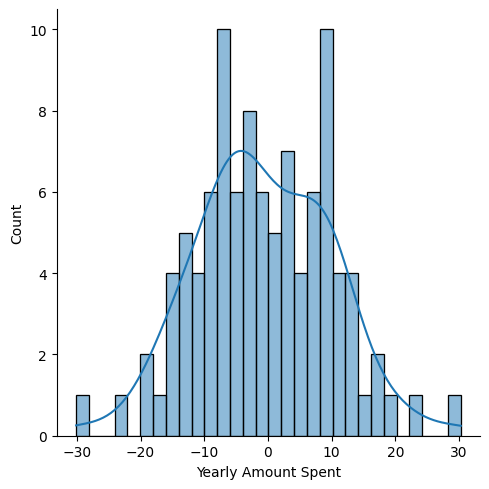

In [25]:
sns.displot(residuals, bins = 30, kde = True)

In [26]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_scratch))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_scratch))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_scratch)))

Mean Absolute Error: 8.55649785644639
Mean Squared Error: 109.8285460471831
RMSE: 10.479911547679356


In [27]:
error_score = metrics.r2_score(y_test, y_pred_scratch)
print(f"R squared Error: {error_score:.2f}")

R squared Error: 0.98


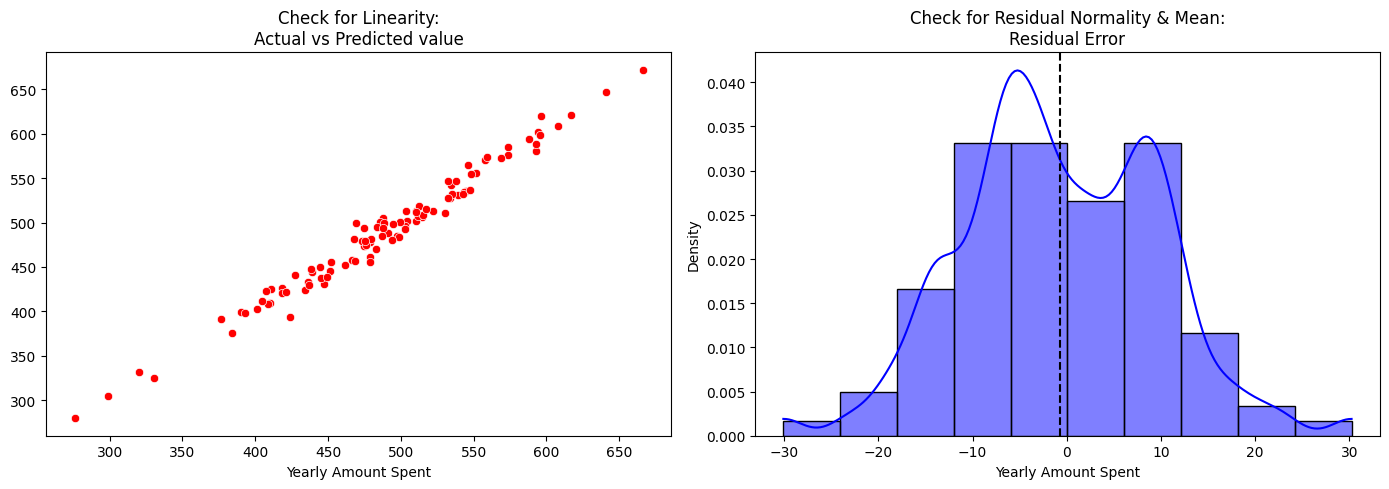

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(14,5))

ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_scratch, ax=ax, color='r')
ax.set_title('Check for Linearity:\nActual vs Predicted value')

ax = f.add_subplot(122)
residuals = y_test - y_pred_scratch
sns.histplot(residuals, ax=ax, color='b', stat='density', kde=True, kde_kws={
    'bw_method': 0.2,
    'cut': 0
})
ax.axvline(residuals.mean(), color='k', linestyle='--')
ax.set_title('Check for Residual Normality & Mean:\nResidual Error')

plt.tight_layout()
plt.show()


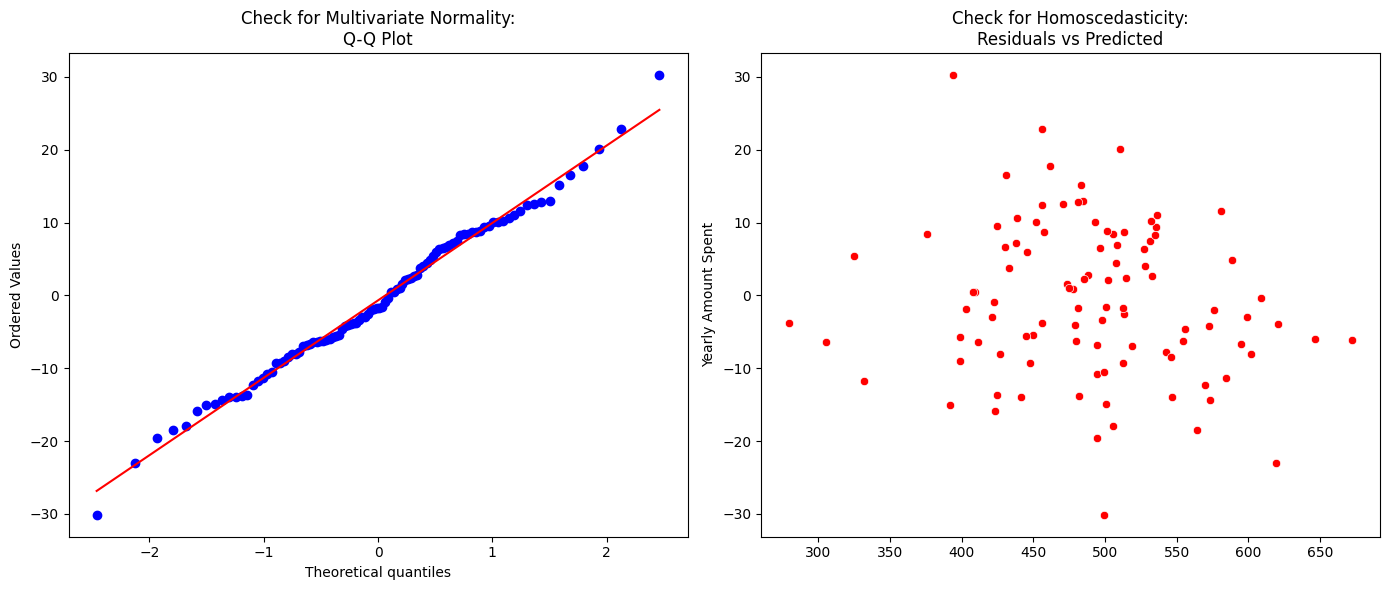

In [29]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_scratch

f, ax = plt.subplots(1, 2, figsize=(14, 6))
_, (_, _, r) = sp.stats.probplot(residuals, fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality:\nQ-Q Plot')

sns.scatterplot(y=residuals, x=y_pred_scratch, ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity:\nResiduals vs Predicted')

plt.tight_layout()
plt.show()


In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

X_const = sm.add_constant(X_scaled_df)

vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(vif_data)


                feature       VIF
0                 const  1.000000
1   Avg. Session Length  1.002108
2           Time on App  1.010286
3       Time on Website  1.008626
4  Length of Membership  1.006126


In [31]:
from sklearn.linear_model import LinearRegression

vif = {}
for col in X.columns:
    X_other = X.drop(columns=[col])
    r2_col = LinearRegression().fit(X_other, X[col]).score(X_other, X[col])
    vif[col] = 1 / (1 - r2_col)

print(vif)

{'Avg. Session Length': 1.0054215666026727, 'Time on App': 1.008684400510409, 'Time on Website': 1.0102752406694138, 'Length of Membership': 1.0069490484316488}
